<a href="https://colab.research.google.com/github/ameschini2206/Primera-Entrega-DSII---Alejandro-Meschini/blob/main/Primera%20Entrega.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto DATA SCIENCE II
## Primera Entrega  
### Archivo: Primera Entrega.ipynb

---
#### Variables y definición

**1. Variables de Transacción (Operativas)**

ORDERNUMBER: El identificador único de la factura. Útil para agrupaciones, pero no para predicción directa.

QUANTITYORDERED: Cantidad de unidades pedidas. Indica el volumen de la venta.

PRICEEACH: Precio unitario de cada producto en esa orden.

ORDERLINENUMBER: El número de línea dentro de la misma orden (si un cliente compró varios productos distintos).

SALES: El monto total de la venta (Quantity X Price). Es la variable económica clave.

**2. Variables Temporales y de Estado**

ORDERDATE: Fecha de la venta. Crucial para analizar estacionalidad (ej. ¿se vende más en Navidad?).
DAYS_SINCE_LASTORDER: Variable de comportamiento. Indica la frecuencia de compra del cliente.
STATUS: El estado del pedido (Shipped, Cancelled, Resolved, On Hold).

**3. Variables de Producto**

PRODUCTLINE: Categoría del producto (Motorcycles, Classic Cars, etc.). Ayuda a segmentar el mercado.

MSRP: Precio de venta sugerido por el fabricante. Sirve para ver si estamos vendiendo con descuento o sobreprecio.

PRODUCTCODE: Identificador único del modelo de producto.

**4. Variables del Cliente y Geografía**

CUSTOMERNAME / CONTACT: Nombre de la empresa y la persona de contacto.

CITY / COUNTRY: Ubicación geográfica

DEALSIZE:  Tamaño del trato (Small, Medium, Large).


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url_proyecto:str = r'https://raw.githubusercontent.com/ameschini2206/Primera-Entrega-DSII---Alejandro-Meschini/refs/heads/main/Auto%20Sales%20data.csv'
df = pd.read_csv(url_proyecto)
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,24/02/2018,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,07/05/2018,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,01/07/2018,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,25/08/2018,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,28/10/2018,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ORDERNUMBER           2747 non-null   int64  
 1   QUANTITYORDERED       2747 non-null   int64  
 2   PRICEEACH             2747 non-null   float64
 3   ORDERLINENUMBER       2747 non-null   int64  
 4   SALES                 2747 non-null   float64
 5   ORDERDATE             2747 non-null   object 
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64  
 7   STATUS                2747 non-null   object 
 8   PRODUCTLINE           2747 non-null   object 
 9   MSRP                  2747 non-null   int64  
 10  PRODUCTCODE           2747 non-null   object 
 11  CUSTOMERNAME          2747 non-null   object 
 12  PHONE                 2747 non-null   object 
 13  ADDRESSLINE1          2747 non-null   object 
 14  CITY                  2747 non-null   object 
 15  POSTALCODE           

In [5]:
columnas_a_eliminar = ['PHONE', 'ADDRESSLINE1', 'PRODUCTCODE', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME', 'POSTALCODE'] #No me va a sumar en el análisis

df= df.drop(columns=columnas_a_eliminar)

In [6]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,CUSTOMERNAME,CITY,COUNTRY,DEALSIZE
0,10107,30,95.70,2,2871.00,24/02/2018,828,Shipped,Motorcycles,95,Land of Toys Inc.,NYC,USA,Small
1,10121,34,81.35,5,2765.90,07/05/2018,757,Shipped,Motorcycles,95,Reims Collectables,Reims,France,Small
2,10134,41,94.74,2,3884.34,01/07/2018,703,Shipped,Motorcycles,95,Lyon Souveniers,Paris,France,Medium
3,10145,45,83.26,6,3746.70,25/08/2018,649,Shipped,Motorcycles,95,Toys4GrownUps.com,Pasadena,USA,Medium
4,10168,36,96.66,1,3479.76,28/10/2018,586,Shipped,Motorcycles,95,Technics Stores Inc.,Burlingame,USA,Medium


In [7]:
df['DIFF_PERCENTAGE'] = ((df['MSRP'] - df['PRICEEACH']) / df['MSRP']) * 100
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,CUSTOMERNAME,CITY,COUNTRY,DEALSIZE,DIFF_PERCENTAGE
0,10107,30,95.70,2,2871.00,24/02/2018,828,Shipped,Motorcycles,95,Land of Toys Inc.,NYC,USA,Small,-0.736842
1,10121,34,81.35,5,2765.90,07/05/2018,757,Shipped,Motorcycles,95,Reims Collectables,Reims,France,Small,14.368421
2,10134,41,94.74,2,3884.34,01/07/2018,703,Shipped,Motorcycles,95,Lyon Souveniers,Paris,France,Medium,0.273684
3,10145,45,83.26,6,3746.70,25/08/2018,649,Shipped,Motorcycles,95,Toys4GrownUps.com,Pasadena,USA,Medium,12.357895
4,10168,36,96.66,1,3479.76,28/10/2018,586,Shipped,Motorcycles,95,Technics Stores Inc.,Burlingame,USA,Medium,-1.747368


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ORDERNUMBER,2747.0,10259.761558,91.877521,10100.000000,10181.000000,10264.000000,10334.500000,10425.000000
QUANTITYORDERED,2747.0,35.103021,9.762135,6.000000,27.000000,35.000000,43.000000,97.000000
PRICEEACH,2747.0,101.098952,42.042549,26.880000,68.745000,95.550000,127.100000,252.870000
ORDERLINENUMBER,2747.0,6.491081,4.230544,1.000000,3.000000,6.000000,9.000000,18.000000
SALES,2747.0,3553.047583,1838.953901,482.130000,2204.350000,3184.800000,4503.095000,14082.800000
DAYS_SINCE_LASTORDER,2747.0,1757.085912,819.280576,42.000000,1077.000000,1761.000000,2436.500000,3562.000000
MSRP,2747.0,100.691664,40.114802,33.000000,68.000000,99.000000,124.000000,214.000000
DIFF_PERCENTAGE,2747.0,-4.038784,38.099730,-666.272727,-12.158879,-0.402062,11.517647,77.133803


/tmp/ipython-input-723654638.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='PRODUCTLINE', data=df, palette='viridis')


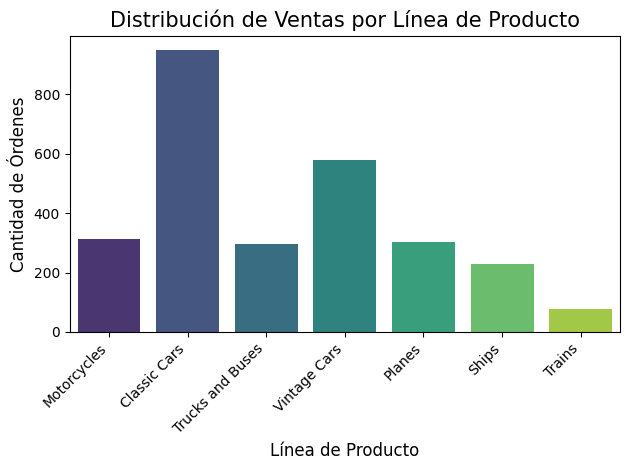

<Figure size 1600x800 with 0 Axes>

In [9]:
sns.countplot(x='PRODUCTLINE', data=df, palette='viridis')
plt.title('Distribución de Ventas por Línea de Producto', fontsize=15)
plt.xlabel('Línea de Producto', fontsize=12)
plt.ylabel('Cantidad de Órdenes', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.figure(figsize=(16, 8))
plt.show()

In [10]:
df['COUNTRY'].value_counts()

,count
COUNTRY,
USA,928
Spain,342
France,314
Australia,185
UK,144
Italy,113
Finland,92
Norway,85
Singapore,79


In [11]:
df['DEALSIZE'].value_counts()

,count
DEALSIZE,
Medium,1349
Small,1246
Large,152


In [21]:
# Agrupamos por país y sumamos la columna SALES
ventas_por_pais = df.groupby('COUNTRY')['SALES'].sum().sort_values(ascending=False).reset_index()

print(ventas_por_pais)

        COUNTRY         SALES
0           USA $3,355,575.69
1         Spain $1,215,686.92
2        France $1,110,916.52
3     Australia   $630,623.10
4            UK   $478,880.46
5         Italy   $374,674.31
6       Finland   $329,581.91
7        Norway   $307,463.70
8     Singapore   $288,488.41
9       Denmark   $245,637.15
10       Canada   $224,078.56
11      Germany   $220,472.09
12       Sweden   $210,014.21
13      Austria   $202,062.53
14        Japan   $188,167.81
15  Switzerland   $117,713.56
16      Belgium   $108,412.62
17  Philippines    $94,015.73
18      Ireland    $57,756.43


/tmp/ipython-input-1898785448.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='SALES', y='COUNTRY', data=ventas_por_pais, palette='viridis')


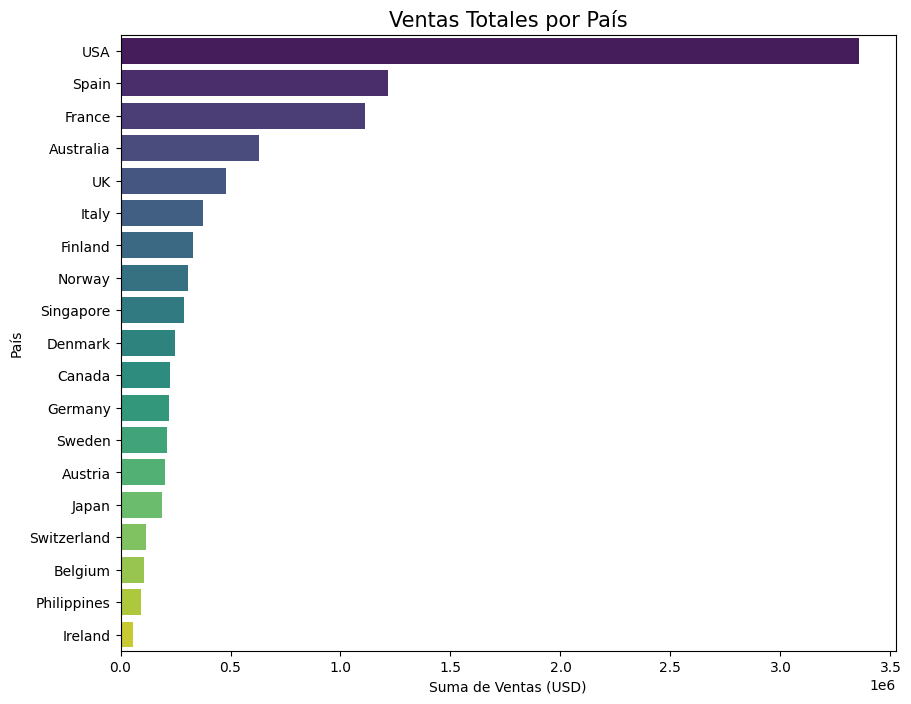

In [22]:
plt.figure(figsize=(10, 8))
sns.barplot(x='SALES', y='COUNTRY', data=ventas_por_pais, palette='viridis')

plt.title('Ventas Totales por País', fontsize=15)
plt.xlabel('Suma de Ventas (USD)')
plt.ylabel('País')
plt.show()

In [23]:
# Vamos a Identificar el país con más ventas (el primero de nuestra lista anterior)
pais_lider = ventas_por_pais.iloc[0]['COUNTRY']

# Filtro el dataframe original solo para ese país
df_pais_lider = df[df['COUNTRY'] == pais_lider]

# Agrupo por línea de producto dentro de ese país
top_productos_pais = df_pais_lider.groupby('PRODUCTLINE')['SALES'].sum().sort_values(ascending=False).reset_index()

print(f"--- Top productos en {pais_lider} ---")
print(top_productos_pais)

--- Top productos en USA ---
        PRODUCTLINE         SALES
0      Classic Cars $1,267,891.10
1      Vintage Cars   $661,280.74
2       Motorcycles   $457,495.55
3  Trucks and Buses   $381,611.77
4            Planes   $322,752.74
5             Ships   $195,290.23
6            Trains    $69,253.56


/tmp/ipython-input-3611528255.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='SALES', y='PRODUCTLINE', data=top_productos_pais, palette='magma')


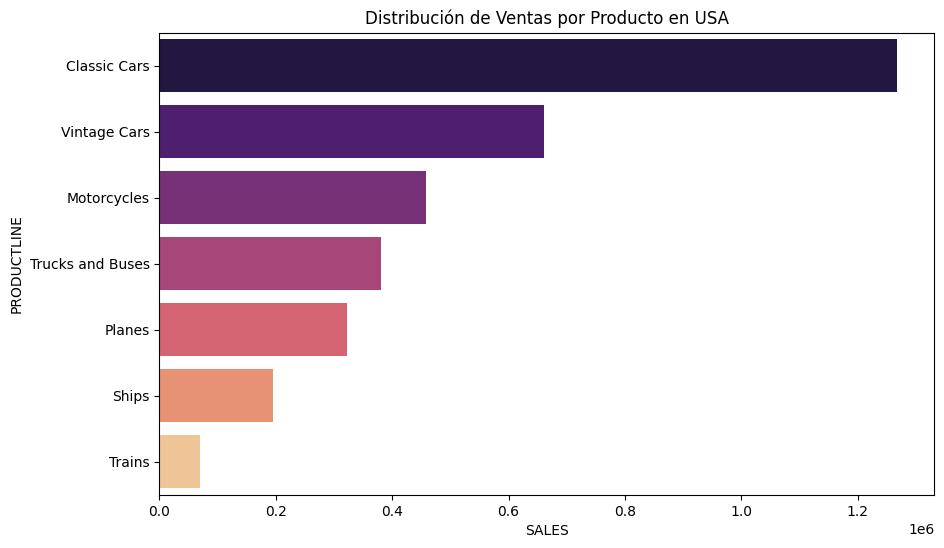

In [24]:
plt.figure(figsize=(10, 6))
sns.barplot(x='SALES', y='PRODUCTLINE', data=top_productos_pais, palette='magma')
plt.title(f'Distribución de Ventas por Producto en {pais_lider}')
plt.show()

In [27]:
pd.reset_option('display.float_format')
print(df['QUANTITYORDERED'].describe())

count    2747.000000
mean       35.103021
std         9.762135
min         6.000000
25%        27.000000
50%        35.000000
75%        43.000000
max        97.000000
Name: QUANTITYORDERED, dtype: float64


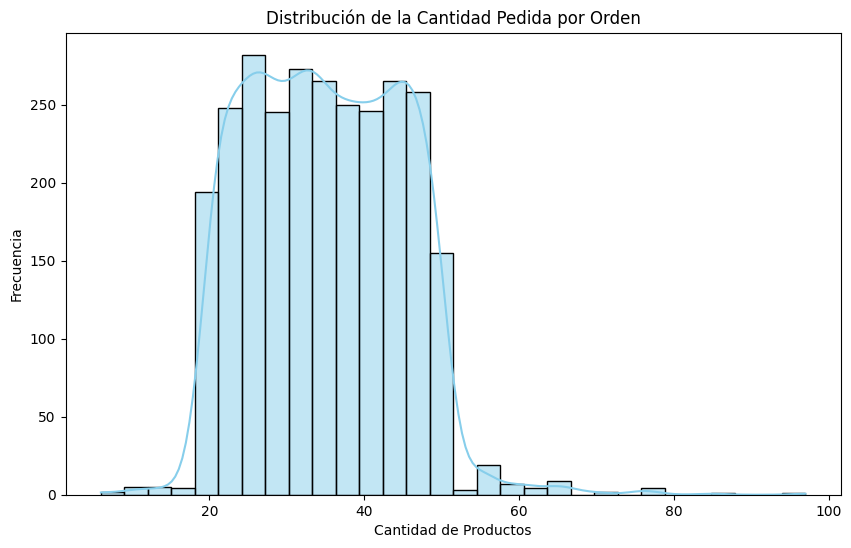

In [28]:
plt.figure(figsize=(10, 6))
sns.histplot(df['QUANTITYORDERED'], kde=True, color='skyblue', bins=30)
plt.title('Distribución de la Cantidad Pedida por Orden')
plt.xlabel('Cantidad de Productos')
plt.ylabel('Frecuencia')
plt.show()

In [26]:
print(df['DEALSIZE'].describe())

count       2747
unique         3
top       Medium
freq        1349
Name: DEALSIZE, dtype: object
